    
# Data Science and Machine Learning Go Mainstream
<div style="margin-left: 125px; margin-bottom:50px; border:1px dotted #660033; padding:5px 10px; background-color:#ffffff; width:375px; text-align:center"><span style="color:#660033; font-style: italic; font-size:1.25em">It's not just for computer scientists anymore!™</span></div>

-----------

#### Table of Contents
* **[Industry Usage of DS & ML](#Industry-Usage-of-Data-Science-and-Machine-Learning)**
    - [Survey Responses by Industry](#Survey-Responses-by-Industry)
* **[Introduction](#Introduction)**
    - [Industry Legend](#Industry-Legend)
* **[Tools and Platforms](#Tools-and-Platforms)**
    - [Analysis](#tools-analysis)
    - [Highlights](#tools-takeaways)
* **[Algorithms](#Algorithms)**
    - [Analysis](#algorithms-analysis)
    - [Highlights](#algorithms-takeaways)
* **[Community](#Community)**
    - [Analysis](#community-analysis)
    - [Highlights](#community-takeaways)
* **[Conclusion](#Conclusion)**
-----------

In [ ]:
# --- Set up the environment with imports and function definitions ---

# This Python 3 environment comes with many helpful analytics libraries installed!
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # Working with filesystems

import matplotlib # visualizations
import matplotlib.pyplot as plt # plotting and styling
import seaborn as sns # more data visualizations
import matplotlib.font_manager as fm # for using custom fonts
from math import pi # Used when drawing "radar" plots

# Input data files get stored the read-only "../input/" directory.
# This function will load a CSV file into a pandas dataframe
def load_csv(file_path):
    """Load the specified file into a pandas dataframe.
       The file_path should be the entire path, including
       the '/kaggle/input' directory and any subdirectories.
       Returns a dataframe."""
    df = pd.read_csv(file_path,low_memory=False,encoding='UTF-8')
    return df

# --- Set up fonts and constants ---

# Set default fonts and sizes for matplotlib and seaborn
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 12})
sns.set(rc={'figure.figsize':(8,6)})
# Use a custom font for showing special symbols as xlabels
SYMBOL_FONT = fm.FontProperties(fname='../input/notoemojifont/noto-emoji.regular.ttf', size=20)    

# Set some constants we'll be referring to regularly
INDUSTRY_COLUMN = 'Q20'

# These are the industries that we're interested in drilling into more closely,
# and the symbols we're using to represent them in the charts
from collections import OrderedDict
INDUSTRIES_OF_INTEREST = OrderedDict([
    ('Accounting/Finance', '💲'),
    ('Broadcasting/Communications', '📡'),
    ('Energy/Mining', '☀'),
    ('Government/Public Service', '🏢'),
    ('Hospitality/Entertainment/Sports', '⚽'),
    ('Insurance/Risk Assessment', '☔'),
    ('Marketing/CRM', '🌠'),
    ('Manufacturing/Fabrication', '🚧'),
    ('Medical/Pharmaceutical', '🔬'),
    ('Military/Security/Defense', '🛂'),
    ('Non-profit/Service', '👫'),
    ('Retail/Sales', '👜'),
    ('Shipping/Transportation', '🚢'),
    ('Other', '❔')
])

# These are the specific questions (and their user-friendly labels) that
# we want to drill into more closely
QUESTIONS_OF_INTEREST = {
    'Q7': 'What programming languages does each industry use on a regular basis?',
    'Q9': 'Which IDEs do the different industries use?',
    'Q17': 'Which ML algorithms do you use on a regular basis?',
    'Q18': 'Which computer vision methods do you use on a regular basis?',
    'Q19': 'Which NLP methods do you use on a regular basis?',
    'Q27a': 'Which cloud computing platforms does each industry use?',
    'Q32a': 'Which big data products are used by the different industries? ',
    'Q39': 'Where do you publicly share or deploy your data analysis or machine learning applications?',
    'Q40': 'On which platforms have you begun or completed data science courses?',
    'Q42': 'Who/what are your favorite media sources that report on data science topics?'
}

# --- Set up charting functions ---

# Because of the wacky font being used for the symbols, we get some runtime warnings
# about missing glyphs; set these to be ignored, since the symbols render properly
import warnings
warnings.filterwarnings("ignore", message="Glyph 108 missing from current font.")
warnings.filterwarnings("ignore", message="Glyph 112 missing from current font.")

# A function that will allow us to draw a heatmap for the results of a given question
def draw_heatmap(dataframe, label, cmap, industry_colors=None):
    # The dataframe has three pieces of information that we want to visualize
    # the relationships between: Answers, Industry, and Percent of respondents.
    # Some questions we might want to know the answers to are:
    # - Which of the answers were the most popular overall (e.g. 'Recurrent Neural Networks'
    #   vs. 'Generative Adversarial Networks'),
    # - Which answers were popular for which industry (e.g. does 'Military/Security/Defense'
    #   use 'Decision Trees or Random Forests' more or less than 'Academics/Education' does?)
    #
    # One useful way to visualize this information is with heatmaps; the answers will be on
    # the Y-axis, and the industries are on the X-axis. Color/intensity indicates what
    # percentage of respondents from each industry chose that answer.
    
    # Sort the result in order by most popular to least popular (arbitrarily based on
    # the first industry; they'll be close enough that this is a useful way to look at them for all)
    sorted_df = dataframe.sort_values(dataframe.columns[0], inplace = False, ascending=False)

    # Set up for the heatmap
    fig, ax = plt.subplots(figsize=(10, 7))
    sns.heatmap(sorted_df, cmap=cmap, square=True, linewidth=0.1, cbar_kws={'shrink':0.75})

    # Make the Y-axis labels a little larger
    ax.tick_params(axis="y", direction="out", grid_color="gray", left=True,
                  labelleft=True, labelsize=13)
    
    # Use the symbols as labels
    ax.set_xticklabels(INDUSTRIES_OF_INTEREST.values(), fontproperties=SYMBOL_FONT)
    # Rotate them to be vertical and put them at the top
    plt.xticks(rotation=0)
    ax.xaxis.tick_top() # x axis on top
    ax.xaxis.set_label_position('top')
    # And set symbol colors if specified
    if industry_colors:
        for tick, color in zip(ax.get_xticklabels(), industry_colors):
            tick.set_color(color)

    # Display the title
    plt.title(label, loc='center', fontname='Helvetica', size=16)
    # Show the full plot
    plt.show()

    
# A function that will draw a bubble plot for the results of a question
def draw_bubble_plot(dataframe, label, cmap, industry_colors=None):
    # Since we're plotting categorical variables, the bubble
    # plot is effectively the same as a heatmap, only with different
    # styling. Similarly, there will be three different variables we want
    # to visualize: answer, industry, and percentage of respondents.
    sorted_df = dataframe.sort_values(dataframe.columns[0], inplace = False, ascending=False)

    # Turn the one-column-per-industry format into a single column containing
    # the industry as a string, with multiple rows per answer; this makes it
    # easier to plot on a bubble/scatter plot
    sorted_df['Answer'] = sorted_df.index
    sorted_df = sorted_df.melt(id_vars=["Answer"],
                               var_name="Industry",
                               value_name="Responses", ignore_index=True)
    
    # use the scatterplot function to build the plot; it's too hard to distinguish
    # different sizes to communicate number of responses, so we're relying soley
    # on color (and thus it effectively becomes another form of heatmap)
    g = sns.scatterplot(data=sorted_df, x='Industry', y='Answer', size="Responses",
                        palette=cmap, hue="Responses",
                        legend='brief', sizes=(500, 500))
    
    g.set_xticks(g.get_xticks()) # Avoids a warning about FixedFormatter+FixedLocator

    # Styling
    g.tick_params(axis="x", direction="out", grid_color="gray", top=True, bottom=False, 
                  labeltop=True, labelbottom=False)
    g.tick_params(axis="y", direction="out", grid_color="gray", left=True,
                  labelleft=True, labelsize=13)
    g.set(xlabel=None, ylabel=None)
    
    # Use the symbols as labels
    g.set_xticklabels(INDUSTRIES_OF_INTEREST.values(), fontproperties=SYMBOL_FONT)
    # And set symbol colors if specified
    if industry_colors:
        for tick, color in zip(g.get_xticklabels(), industry_colors):
            tick.set_color(color)

    # Reverse the order of the legend to match how the values are plotted,
    # and put it outside of the plot
    h, l = g.get_legend_handles_labels()
    h.reverse()
    l.reverse()
    g.legend(h, l, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
    
    # Display the title
    plt.title(label, loc='center', fontname='Helvetica', size=16)

    # Finally, show the plot
    plt.show()
        
# A function that will draw a radar plot for the results of a question
# Thanks to https://www.python-graph-gallery.com/392-use-faceting-for-radar-chart for
# some of this code
def draw_radar_chart(dataframe, label, cmap):
    # The radar chart is fairly messy when we have lots of variables (e.g. 14
    # industries), but we do use it occasionally for a little variation. It's
    # basically a line chart, except it wraps around into a circle. When there
    # happen to be 12 choices (e.g. media sources from the final question), the
    # resultant clock-like distribution is fairly pleasing.
    original_columns = dataframe.columns
    sorted_df = dataframe.sort_values(original_columns[0], inplace = False, ascending=False)
    transposed_df = sorted_df.transpose()

    def draw_line_for_industry(row, title, colors, location=1, fill_polygons=False):
        # For each industry, initialize the plot and draw
        # out the answer labels. Even though the current usage of
        # lines for all the industries on a single plot means that
        # we could do this initialization just once, there's another use case
        # here where we might want to draw a different plot for
        # each industry to make it easier to see the difference,
        # and this would support that (and doesn't harm the current
        # use case, apart from slowing it down a little).
        
        # Get the answer labels and how many of them there are
        categories = row.index
        N = len(categories)
        # Determine the angle for each answer on the plot (i.e.
        # how to arrange the answers around the plot evenly)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1] # Wrap the plot back around to form an enclosing polygon

        # Initialise the plot; "location" could be varied per
        # industry to show a plot for each industry, if desired
        ax = plt.subplot(2, 2, location, polar=True)

        # Put the first answer at the top
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)

        # Draw one tick per answer, and add labels
        plt.xticks(angles[:-1], categories, color='black', size=13)

        # Draw the labels for the percentages of responses (the "Y" axis);
        # assume there won't be more than 60 per answer
        ax.set_rlabel_position(0)
        plt.yticks([10,20,30,40,50], ["10","20","30","40", "50"], color="grey", size=7)
        plt.ylim(0,60)

        # Get the values for this industry
        values = row.values
        # Add the first value to the end of the array, so that the line loops
        # back around to the starting point (enclosing polygon)
        values = np.append(values, values[:1])
        
        # Plot the values
        ax.plot(angles, values, color=colors[row.name], linewidth=3, linestyle='solid')
        # Fill them if desired
        if fill_polygons:
            ax.fill(angles, values, color=colors[row.name], alpha=0.4)

        # Display the title
        plt.title(title, loc='center', fontname='Helvetica', size=16)

    # Now, draw the plot for each row in the dataset
    plt.figure(figsize=(15, 15))
    # Set a color for each industry
    industry_colors = {}
    for index, industry in enumerate(original_columns):
        color = cmap(index/len(original_columns))
        industry_colors[industry] = color

    transposed_df.apply(draw_line_for_industry, args=(label, industry_colors), axis=1)
    industries_for_legend = [symbol for (industry, symbol) in INDUSTRIES_OF_INTEREST.items() if industry in original_columns]
    plt.legend(industries_for_legend, bbox_to_anchor=(1.2, 1), loc='upper left', prop=SYMBOL_FONT)



# --- OK, let's get started! Load in the primary response dataframe ---

# Load all the 2021 survey responses into a pandas dataframe
file_name_2021 = '/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv'
survey_df_2021 = load_csv(file_name_2021)
responses_df_2021 = survey_df_2021[1:] # The first row is labels; trim that off


# Industry Usage of Data Science and Machine Learning

The disciplines of Data Science and Machine Learning have their roots in mathematics, statistics, and computer science. Perhaps it is to be expected, then, that most users of DS & ML (and related tools) work in computer-dominated fields and industries such as internet businesses and computer services, as well as in academia and research.

But Data Science and Machine Learning are also being used in more "mainstream" industries, and they're being used in interesting and unconventional ways. This notebook digs into the specifics of that non-traditional usage. Its primary goals are to find ways in which Kaggle and the community can best support industry users, and to identify potential missed opportunities for broader industry usage of DS & ML.


## Survey Responses by Industry

In the 2021 Kaggle Machine Learning and Data Science survey, respondents were asked to specify the industry of their current or most recent employer. Unsurprisingly, respondents who specified their industry overwhelmingly reported being in the fields of **Computers/Technology** (`25%`) or **Academics/Education** (`19.7%`). However, that means that over half of the responses were from other industries, and this dataset provides a rich field for further analysis.

In [ ]:
# For the first plot, we're just showing a basic plot of the percentage of respondents
# from each industry. Determine these percentages using "value_counts" on the full dataset.
industry_percents = responses_df_2021[INDUSTRY_COLUMN].value_counts(normalize=True).mul(100).round(1)
# Turn that information into a dataframe for easy plotting
industry_percents_df = pd.DataFrame({'Percent of Respondents': industry_percents})
industry_percents_df.sort_values(by=['Percent of Respondents'], ascending=True, inplace=True)
color = "#006699"

# Use the hlines function of matplotlib.pyplot to draw the lines for a horizontal "lollipop" chart.
# Note: In order to get rid of the left margin but still allow a little bit of a right-hand
# margin so that the "bubble" is fully visible, we're drawing an extra white line at the top and bottom
# of the chart to make it wider than it would normally be. (Since we're drawing those extra lines, we
# also don't need top and bottom margins, so those are turned off.)
plt.margins(0)
plt.hlines(y=[' '], xmin=0, xmax=30, color='white')
plt.hlines(y=industry_percents_df.index, xmin=0,
           xmax=industry_percents_df['Percent of Respondents'],
           color=color)
plt.hlines(y=['  '], xmin=0, xmax=30, color='white')

# Plot the "bubble" part of the lollipops
plt.plot(industry_percents_df['Percent of Respondents'], industry_percents_df.index,
         linestyle='None', markersize=10, marker='o', color=color)
# Add titles and axis names
plt.yticks(industry_percents_df.index, industry_percents_df.index, size=13)
plt.title("Industries that Use Data Science / Machine Learning", loc='center', size=16)
plt.xlabel('Percent of Total Respondents')

# Show the plot
plt.show()

In [ ]:

# --- Set up relevant lookups for questions/answers ---

# Questions where respondents can select more than one answer choice have been split into multiple columns.
# Ultimately, we'll be wanting to do counts of each answer choice for various subsets of the data. Here,
# we set up dicts that map each user-friendly answer choice name over to the column that holds it. When we
# go to do counts, we can use this column lookup to find the appropriate column to count for each answer.
# Once we've defined these dictionaries, the rest of the computations are easy to make dynamic.
# (Thanks to https://www.kaggle.com/paultimothymooney/2021-kaggle-data-science-machine-learning-survey/notebook
# for inspiration for this code; it has been modified to be more dynamically accessible per industry.)
dictionary_of_columns = {}
dictionary_of_columns['Q7'] = {
    'Python' : 'Q7_Part_1',
    'R': 'Q7_Part_2',
    'SQL' : 'Q7_Part_3',
    'C' : 'Q7_Part_4',
    'C++' : 'Q7_Part_5',
    'Java' : 'Q7_Part_6',
    'Javascript' : 'Q7_Part_7',
    'Julia' : 'Q7_Part_8',
    'Swift' : 'Q7_Part_9',
    'Bash' : 'Q7_Part_10',
    'MATLAB' : 'Q7_Part_11',
    'None' : 'Q7_Part_12',
    'Other' : 'Q7_OTHER'
}

dictionary_of_columns['Q9'] = {
    'JupyterLab' : 'Q9_Part_1',
    'RStudio': 'Q9_Part_2',
    'Visual Studio' : 'Q9_Part_3',
    'Visual Studio Code (VSCode)' : 'Q9_Part_4',
    'PyCharm' : 'Q9_Part_5',
    'Spyder' : 'Q9_Part_6',
    'Notepad++' : 'Q9_Part_7',
    'Sublime Text' : 'Q9_Part_8',
    'Vim, Emacs, or similar' : 'Q9_Part_9',
    'MATLAB' : 'Q9_Part_10',
    'Jupyter Notebook' : 'Q9_Part_11',    
    'None' : 'Q9_Part_12',
    'Other' : 'Q9_OTHER'
}

dictionary_of_columns['Q10'] = {
    'Kaggle Notebooks' : 'Q10_Part_1',
    'Colab Notebooks': 'Q10_Part_2',
    'Azure Notebooks' : 'Q10_Part_3',
    'Paperspace / Gradient' : 'Q10_Part_4',
    'Binder / JupyterHub' : 'Q10_Part_5',
    'Code Ocean' : 'Q10_Part_6',
    'IBM Watson Studio' : 'Q10_Part_7',
    'Amazon Sagemaker Studio Notebooks' : 'Q10_Part_8',
    'Amazon EMR Notebooks' : 'Q10_Part_9',
    'Google Cloud Notebooks (AI Platform / Vertex AI)' : 'Q10_Part_10',
    'Google Cloud Datalab' : 'Q10_Part_11',
    'Databricks Collaborative Notebooks' : 'Q10_Part_12',
    'Zeppelin / Zepl Notebooks' : 'Q10_Part_13',
    'Deepnote Notebooks' : 'Q10_Part_14',
    'Observable Notebooks' : 'Q10_Part_15',
    'None' : 'Q10_Part_16',
    'Other' : 'Q10_OTHER'
}

dictionary_of_columns['Q12'] = {
    'NVIDIA GPUs' : 'Q12_Part_1',
    'Google Cloud TPUs': 'Q12_Part_2',
    'AWS Trainium Chips': 'Q12_Part_3',
    'AWS Inferentia Chips': 'Q12_Part_4',
    'None' : 'Q12_Part_5',
    'Other' : 'Q12_OTHER'
}

dictionary_of_columns['Q14'] = {
    'Matplotlib' : 'Q14_Part_1',
    'Seaborn': 'Q14_Part_2',
    'Plotly / Plotly Express' : 'Q14_Part_3',
    'Ggplot / ggplot2' : 'Q14_Part_4',
    'Shiny' : 'Q14_Part_5',
    'D3.js' : 'Q14_Part_6',
    'Altair' : 'Q14_Part_7',
    'Bokeh' : 'Q14_Part_8',
    'Geoplotlib' : 'Q14_Part_9',
    'Leaflet / Folium' : 'Q14_Part_10',
    'None' : 'Q14_Part_11',
    'Other' : 'Q14_OTHER'
}

dictionary_of_columns['Q16'] = {
    'Scikit-learn' : 'Q16_Part_1',
    'TensorFlow': 'Q16_Part_2',
    'Keras' : 'Q16_Part_3',
    'PyTorch' : 'Q16_Part_4',
    'Fast.ai' : 'Q16_Part_5',
    'MXNet' : 'Q16_Part_6',
    'Xgboost' : 'Q16_Part_7',
    'LightGBM' : 'Q16_Part_8',
    'CatBoost' : 'Q16_Part_9',
    'Prophet' : 'Q16_Part_10',
    'H20-3' : 'Q16_Part_11',
    'Caret' : 'Q16_Part_12',
    'Tidymodels' : 'Q16_Part_13',
    'JAX' : 'Q16_Part_14',
    'PyTorch Lightning' : 'Q16_Part_15',\
    'Huggingface' : 'Q16_Part_16',
    'None' : 'Q16_Part_17',
    'Other' : 'Q16_OTHER'
}

dictionary_of_columns['Q17'] = {
    'Linear or Logistic Regression' : 'Q17_Part_1',
    'Decision Trees or Random Forests': 'Q17_Part_2',
    'Gradient Boosting Machines' : 'Q17_Part_3',
    'Bayesian Approaches' : 'Q17_Part_4',
    'Evolutionary Approaches' : 'Q17_Part_5',
    'Dense Neural Networks (MLPs, etc)' : 'Q17_Part_6',
    'Convolutional Neural Networks' : 'Q17_Part_7',
    'Generative Adversarial Networks' : 'Q17_Part_8',
    'Recurrent Neural Networks' : 'Q17_Part_9',
    'Transformer Networks (BERT, gpt-3, etc)' : 'Q17_Part_10',
    'None' : 'Q17_Part_11',
    'Other' : 'Q17_OTHER'
}

dictionary_of_columns['Q18'] = {
    'General purpose image/video tools' : 'Q18_Part_1',
    'Image segmentation methods': 'Q18_Part_2',
    'Object detection methods' : 'Q18_Part_3',
    'Image classification' : 'Q18_Part_4',
    'Generative Networks' : 'Q18_Part_5',
    'None' : 'Q18_Part_6',
    'Other' : 'Q18_OTHER'
}

dictionary_of_columns['Q19'] = {
    'Word embeddings/vectors' : 'Q19_Part_1',
    'Encoder-decoder models': 'Q19_Part_2',
    'Contextualized embeddings' : 'Q19_Part_3',
    'Transformer language models' : 'Q19_Part_4',
    'None' : 'Q19_Part_5',
    'Other' : 'Q19_OTHER'
}

dictionary_of_columns['Q24'] = {
    'Analyze and understand data to influence product or business decisions' : 'Q24_Part_1',
    'Build and/or run the data infrastructure for storing, analyzing, and operationalizing data': 'Q24_Part_2',
    'Build prototypes to explore applying machine learning to new areas' : 'Q24_Part_3',
    'Build and/or run a machine learning service that operationally improves my product or workflows' : 'Q24_Part_4',
    'Experimentation and iteration to improve existing ML models' : 'Q24_Part_5',
    'Do research that advances the state of the art of machine learning' : 'Q24_Part_6',
    'None of these activities are an important part of my role at work' : 'Q24_Part_7',
    'Other' : 'Q24_OTHER'
}

dictionary_of_columns['Q27a'] = {
    'Amazon Web Services (AWS)' : 'Q27_A_Part_1',
    'Microsoft Azure': 'Q27_A_Part_2',
    'Google Cloud Platform (GCP)' : 'Q27_A_Part_3',
    'IBM Cloud / Red Hat' : 'Q27_A_Part_4',
    'Oracle Cloud' : 'Q27_A_Part_5',
    'SAP Cloud' : 'Q27_A_Part_6',
    'Salesforce Cloud' : 'Q27_A_Part_7',
    'VMware Cloud' : 'Q27_A_Part_8',
    'Alibaba Cloud' : 'Q27_A_Part_9',
    'Tencent Cloud' : 'Q27_A_Part_10',
    'None' : 'Q27_A_Part_11',
    'Other' : 'Q27_A_OTHER'
}

dictionary_of_columns['Q27b'] = {
    'Amazon Web Services (AWS)' : 'Q27_B_Part_1',
    'Microsoft Azure': 'Q27_B_Part_2',
    'Google Cloud Platform (GCP)' : 'Q27_B_Part_3',
    'IBM Cloud / Red Hat' : 'Q27_B_Part_4',
    'Oracle Cloud' : 'Q27_B_Part_5',
    'SAP Cloud' : 'Q27_B_Part_6',
    'Salesforce Cloud' : 'Q27_B_Part_7',
    'VMware Cloud' : 'Q27_B_Part_8',
    'Alibaba Cloud' : 'Q27_B_Part_9',
    'Tencent Cloud' : 'Q27_B_Part_10',
    'None' : 'Q27_B_Part_11',
    'Other' : 'Q27_B_OTHER'
}

dictionary_of_columns['Q29a'] = {
    'Amazon Elastic Compute Cloud (EC2)' : 'Q29_A_Part_1',
    'Microsoft Azure Virtual Machines' : 'Q29_A_Part_2',
    'Google Cloud Compute Engine' : 'Q29_A_Part_3',
    'No / None' : 'Q29_A_Part_4',
    'Other' : 'Q29_A_OTHER'
}

dictionary_of_columns['Q29b'] = {
    'Amazon Elastic Compute Cloud (EC2)' : 'Q29_B_Part_1',
    'Microsoft Azure Virtual Machines' : 'Q29_B_Part_2',
    'Google Cloud Compute Engine' : 'Q29_B_Part_3',
    'No / None' : 'Q29_B_Part_4',
    'Other' : 'Q29_B_OTHER'
}

dictionary_of_columns['Q30a'] = {
    'Microsoft Azure Data Lake Storage' : 'Q30_A_Part_1',
    'Microsoft Azure Disk Storage': 'Q30_A_Part_2',
    'Amazon Simple Storage Service (S3) ' : 'Q30_A_Part_3',
    'Amazon Elastic File System (EFS) ' : 'Q30_A_Part_4',
    'Google Cloud Storage (GCS) ' : 'Q30_A_Part_5',
    'Google Cloud Filestore' : 'Q30_A_Part_6',
    'No / None' : 'Q30_A_Part_7',
    'Other' : 'Q30_A_OTHER'
}

dictionary_of_columns['Q30b'] = {
    'Microsoft Azure Data Lake Storage' : 'Q30_B_Part_1',
    'Microsoft Azure Disk Storage': 'Q30_B_Part_2',
    'Amazon Simple Storage Service (S3) ' : 'Q30_B_Part_3',
    'Amazon Elastic File System (EFS) ' : 'Q30_B_Part_4',
    'Google Cloud Storage (GCS) ' : 'Q30_B_Part_5',
    'Google Cloud Filestore' : 'Q30_B_Part_6',
    'No / None' : 'Q30_B_Part_7',
    'Other' : 'Q30_B_OTHER'
}

dictionary_of_columns['Q31a'] = {
    'Amazon SageMaker' : 'Q31_A_Part_1',
    'Azure Machine Learning Studio': 'Q31_A_Part_2',
    'Google Cloud Vertex AI' : 'Q31_A_Part_3',
    'DataRobot' : 'Q31_A_Part_4',
    'Databricks' : 'Q31_A_Part_5',
    'Dataiku' : 'Q31_A_Part_6',
    'Alteryx' : 'Q31_A_Part_7',
    'Rapidminer' : 'Q31_A_Part_8',
    'No / None' : 'Q31_A_Part_9',
    'Other' : 'Q31_A_OTHER'
}

dictionary_of_columns['Q31b'] = {
    'Amazon SageMaker' : 'Q31_B_Part_1',
    'Azure Machine Learning Studio': 'Q31_B_Part_2',
    'Google Cloud Vertex AI' : 'Q31_B_Part_3',
    'DataRobot' : 'Q31_B_Part_4',
    'Databricks' : 'Q31_B_Part_5',
    'Dataiku' : 'Q31_B_Part_6',
    'Alteryx' : 'Q31_B_Part_7',
    'Rapidminer' : 'Q31_B_Part_8',
    'No / None' : 'Q31_B_Part_9',
    'Other' : 'Q31_B_OTHER'
}

dictionary_of_columns['Q32a'] = {
    'MySQL' : 'Q32_A_Part_1',
    'PostgreSQL': 'Q32_A_Part_2',
    'SQLite' : 'Q32_A_Part_3',
    'Oracle Database' : 'Q32_A_Part_4',
    'MongoDB' : 'Q32_A_Part_5',
    'Snowflake' : 'Q32_A_Part_6',
    'IBM Db2' : 'Q32_A_Part_7',
    'Microsoft SQL Server' : 'Q32_A_Part_8',
    'Microsoft Azure SQL Database' : 'Q32_A_Part_9', 
    'Microsoft Azure Cosmos DB' : 'Q32_A_Part_10',
    'Amazon Redshift' : 'Q32_A_Part_11', 
    'Amazon Aurora' : 'Q32_A_Part_12',
    'Amazon RDS' : 'Q32_A_Part_13',
    'Amazon DynamoDB' : 'Q32_A_Part_14',
    'Google Cloud BigQuery' : 'Q32_A_Part_15',
    'Google Cloud SQL' : 'Q32_A_Part_16',
    'Google Cloud Firestore' : 'Q32_A_Part_17',
    'Google Cloud BigTable' : 'Q32_A_Part_18',
    'Google Cloud Spanner' : 'Q32_A_Part_19',
    'None' : 'Q32_A_Part_20',
    'Other' : 'Q32_A_OTHER'
}

dictionary_of_columns['Q32b'] = {
    'MySQL' : 'Q32_B_Part_1',
    'PostgreSQL': 'Q32_B_Part_2',
    'SQLite' : 'Q32_B_Part_3',
    'Oracle Database' : 'Q32_B_Part_4',
    'MongoDB' : 'Q32_B_Part_5',
    'Snowflake' : 'Q32_B_Part_6',
    'IBM Db2' : 'Q32_B_Part_7',
    'Microsoft SQL Server' : 'Q32_B_Part_8',
    'Microsoft Azure SQL Database' : 'Q32_B_Part_9', 
    'Microsoft Azure Cosmos DB' : 'Q32_B_Part_10',
    'Amazon Redshift' : 'Q32_B_Part_11', 
    'Amazon Aurora' : 'Q32_B_Part_12',
    'Amazon RDS' : 'Q32_B_Part_13',
    'Amazon DynamoDB' : 'Q32_B_Part_14',
    'Google Cloud BigQuery' : 'Q32_B_Part_15',
    'Google Cloud SQL' : 'Q32_B_Part_16',
    'Google Cloud Firestore' : 'Q32_B_Part_17',
    'Google Cloud BigTable' : 'Q32_B_Part_18',
    'Google Cloud Spanner' : 'Q32_B_Part_19',
    'None' : 'Q32_B_Part_20',
    'Other' : 'Q32_B_OTHER'
}

dictionary_of_columns['Q34a'] = {
    'Amazon QuickSight' : 'Q34_A_Part_1',
    'Microsoft Power BI': 'Q34_A_Part_2',
    'Google Data Studio' : 'Q34_A_Part_3',
    'Looker' : 'Q34_A_Part_4',
    'Tableau' : 'Q34_A_Part_5',
    'Salesforce' : 'Q34_A_Part_6',
    'Tableau CRM' : 'Q34_A_Part_7',
    'Qlik' : 'Q34_A_Part_8',
    'Domo' : 'Q34_A_Part_9',
    'TIBCO Spotfire' : 'Q34_A_Part_10',
    'Alteryx' : 'Q34_A_Part_11',
    'Sisense' : 'Q34_A_Part_12',
    'SAP Analytics Cloud' : 'Q34_A_Part_13',
    'Microsoft Azure Synapse' : 'Q34_A_Part_14',
    'Thoughtspot' : 'Q34_A_Part_15',
    'None' : 'Q34_A_Part_16',
    'Other' : 'Q34_A_OTHER'
}

dictionary_of_columns['Q34b'] = {
    'Amazon QuickSight' : 'Q34_B_Part_1',
    'Microsoft Power BI': 'Q34_B_Part_2',
    'Google Data Studio' : 'Q34_B_Part_3',
    'Looker' : 'Q34_B_Part_4',
    'Tableau' : 'Q34_B_Part_5',
    'Salesforce' : 'Q34_B_Part_6',
    'Tableau CRM' : 'Q34_B_Part_7',
    'Qlik' : 'Q34_B_Part_8',
    'Domo' : 'Q34_B_Part_9',
    'TIBCO Spotfire' : 'Q34_B_Part_10',
    'Alteryx' : 'Q34_B_Part_11',
    'Sisense' : 'Q34_B_Part_12',
    'SAP Analytics Cloud' : 'Q34_B_Part_13',
    'Microsoft Azure Synapse' : 'Q34_B_Part_14',
    'Thoughtspot' : 'Q34_B_Part_15',
    'None' : 'Q34_B_Part_16',
    'Other' : 'Q34_B_OTHER'
}

dictionary_of_columns['Q36a'] = {
    'Automated data augmentation' : 'Q36_A_Part_1',
    'Automated feature engineering/selection': 'Q36_A_Part_2',
    'Automated model selection' : 'Q36_A_Part_3',
    'Automated model architecture searches' : 'Q36_A_Part_4',
    'Automated hyperparameter tuning' : 'Q36_A_Part_5',
    'Automation of full ML pipelines' : 'Q36_A_Part_6',
    'No / None' : 'Q36_A_Part_7',
    'Other' : 'Q36_A_OTHER'
}

dictionary_of_columns['Q36b'] = {
    'Automated data augmentation' : 'Q36_B_Part_1',
    'Automated feature engineering/selection': 'Q36_B_Part_2',
    'Automated model selection' : 'Q36_B_Part_3',
    'Automated model architecture searches' : 'Q36_B_Part_4',
    'Automated hyperparameter tuning' : 'Q36_B_Part_5',
    'Automation of full ML pipelines' : 'Q36_B_Part_6',
    'No / None' : 'Q36_B_Part_7',
    'Other' : 'Q36_B_OTHER'
}

dictionary_of_columns['Q37a'] = {
    'Google Cloud AutoML' : 'Q37_A_Part_1',
    'H20 Driverless AI': 'Q37_A_Part_2',
    'Databricks AutoML' : 'Q37_A_Part_3',
    'DataRobot AutoML' : 'Q37_A_Part_4',
    'Amazon Sagemaker Autopilot' : 'Q37_A_Part_5',
    'Azure Automated Machine Learning' : 'Q37_A_Part_6',
    'No / None' : 'Q37_A_Part_7',
    'Other' : 'Q37_A_OTHER'
}

dictionary_of_columns['Q37b'] = {
    'Google Cloud AutoML' : 'Q37_B_Part_1',
    'H20 Driverless AI': 'Q37_B_Part_2',
    'Databricks AutoML' : 'Q37_B_Part_3',
    'DataRobot AutoML' : 'Q37_B_Part_4',
    'Amazon Sagemaker Autopilot' : 'Q37_B_Part_5',
    'Azure Automated Machine Learning' : 'Q37_B_Part_6',
    'No / None' : 'Q37_B_Part_7',
    'Other' : 'Q37_B_OTHER'
}

dictionary_of_columns['Q38a'] = {
    'Neptune.ai' : 'Q38_A_Part_1',
    'Weights & Biases': 'Q38_A_Part_2',
    'Comet.ml' : 'Q38_A_Part_3',
    'Sacred + Omniboard' : 'Q38_A_Part_4',
    'TensorBoard' : 'Q38_A_Part_5',
    'Guild.ai' : 'Q38_A_Part_6',
    'Polyaxon' : 'Q38_A_Part_7',
    'ClearML' : 'Q38_A_Part_8',
    'Domino Model Monitor' : 'Q38_A_Part_9',
    'MLflow' : 'Q38_A_Part_10',
    'No / None' : 'Q38_A_Part_11',
    'Other' : 'Q38_A_OTHER'
}

dictionary_of_columns['Q38b'] = {
    'Neptune.ai' : 'Q38_B_Part_1',
    'Weights & Biases': 'Q38_B_Part_2',
    'Comet.ml' : 'Q38_B_Part_3',
    'Sacred + Omniboard' : 'Q38_B_Part_4',
    'TensorBoard' : 'Q38_B_Part_5',
    'Guild.ai' : 'Q38_B_Part_6',
    'Polyaxon' : 'Q38_B_Part_7',
    'ClearML' : 'Q38_B_Part_8',
    'Domino Model Monitor' : 'Q38_B_Part_9',
    'MLflow' : 'Q38_B_Part_10',
    'No / None' : 'Q38_B_Part_11',
    'Other' : 'Q38_B_OTHER'
}

dictionary_of_columns['Q39'] = {
    'Plotly Dash' : 'Q39_Part_1',
    'Streamlit': 'Q39_Part_2',
    'NBViewer' : 'Q39_Part_3',
    'GitHub' : 'Q39_Part_4',
    'Personal Blog' : 'Q39_Part_5',
    'Kaggle' : 'Q39_Part_6',
    'Colab' : 'Q39_Part_7',
    'Shiny' : 'Q39_Part_8',
    'None / I do not share my work publicly' : 'Q39_Part_9',
    'Other' : 'Q39_OTHER'
}

dictionary_of_columns['Q40'] = {
    'Coursera' : 'Q40_Part_1',
    'EdX': 'Q40_Part_2',
    'Kaggle Learn Courses' : 'Q40_Part_3',
    'DataCamp' : 'Q40_Part_4',
    'Fast.ai' : 'Q40_Part_5',
    'Udacity' : 'Q40_Part_6',
    'Udemy' : 'Q40_Part_7',
    'LinkedIn Learning' : 'Q40_Part_8',
    'Cloud-certification programs' : 'Q40_Part_9',
    'University Courses' : 'Q40_Part_10',
    'None' : 'Q40_Part_11',
    'Other' : 'Q40_OTHER'
}

dictionary_of_columns['Q42'] = {
    'Twitter' : 'Q42_Part_1',
    'Email newsletters': 'Q42_Part_2',
    'Reddit' : 'Q42_Part_3',
    'Kaggle' : 'Q42_Part_4',
    'Course Forums' : 'Q42_Part_5',
    'YouTube' : 'Q42_Part_6',
    'Podcasts' : 'Q42_Part_7',
    'Blogs' : 'Q42_Part_8',
    'Journal Publications' : 'Q42_Part_9',
    'Slack Communities' : 'Q42_Part_10',
    'None' : 'Q42_Part_11',
    'Other' : 'Q42_OTHER'
}

# --- Drill down by industry for relevant questions ---

# Now we can dig into creating "answer dataframes" for each
# of the questions. These dataframes will contain information
# needed for plotting the answers based on industry. To start
# with, create a dataframe containing all the responses from
# each of the industries; this makes working with them easier.
industry_specific_dataframes = {}
for industry in INDUSTRIES_OF_INTEREST.keys():
    industry_specific_dataframes[industry] = responses_df_2021.loc[responses_df_2021[INDUSTRY_COLUMN] == industry]

# Now, for each of the questions that we're interested in, set up a dataframe that looks like this:
# - Each row represents an "answer" (with the user-friendly answer as the index label)
# - There is a column for each of the "industries of interest"
# - The values for each row are the percent (as an int) of respondents from each of the industries
# that chose that answer. (Note that a lot of these answers are multiple-choice, and
# so those percentages won't add up to "100". That's OK and expected; we're just looking
# for relative popularity of the answers across the industries.)
#
# These dataframes end up looking something like this:
#
# answer_dataframes['Q7']
# Index   Academics/Education   Accounting/Finance ...
# Python  17                    20
# R       25                    12
# SQL     9                     2
# ...
answer_dataframes = {} # This dict will hold all of these "answer dataframes", keyed by question (e.g. 'Q7')
for question in QUESTIONS_OF_INTEREST:
    # Create an empty dataframe for the answer_dataframes dict, with all the answers as row labels,
    # and all the industries as columns (the values at this point will be 'NA')
    answer_dataframes[question] = pd.DataFrame(columns = INDUSTRIES_OF_INTEREST.keys(), 
                                               index = dictionary_of_columns[question].keys())
    # Now, for each industry, calculate the percentage of respondents for each answer and store
    # that as the "value" in the df
    for industry in INDUSTRIES_OF_INTEREST.keys():
        dict_of_percents = {} # Use this to temporarily store the percentages for each answer
        total_respondents = len(industry_specific_dataframes[industry].index) # Number of respondents from this industry
        for (answer, column) in dictionary_of_columns[question].items():
            count = industry_specific_dataframes[industry][column].count() # How many people chose this answer?
            dict_of_percents[answer] = int(round(count/total_respondents*100)) # What was that as a percentage of the total?
        # Finally, assign that value to the master "answer dataframe" for this particular question/industry combination
        answer_dataframes[question][industry] = answer_dataframes[question].index.map(dict_of_percents)
        


# Introduction
This notebook will specifically examine survey responses from users who have reported being members of non-computer-related fields and industries. It seeks to provide insight into questions such as:

* For what sorts of tasks are Data Science and Machine Learning being used in non-CS industries?
* Are certain platforms or languages used more commonly by different industries?
* Do certain industries favor different types of algorithms? 
* Are different industries getting information from different sources? Are they participating in different online communities?

## Industry Legend
As we visualize the data, we'll be using icons to represent the various industries. This makes the charts a little less unwieldy, since some of these industry names are long!

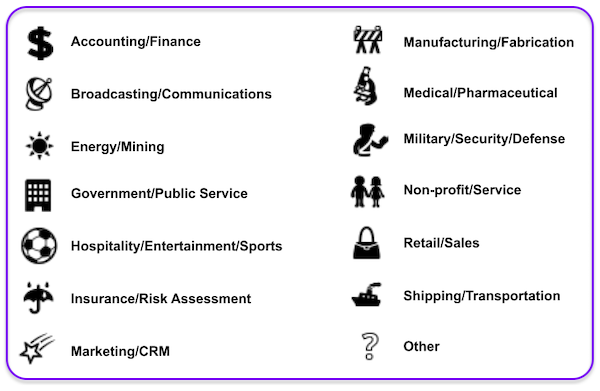

-------------

# Tools and Platforms

<a id="tools-analysis"></a>
## Analysis
To begin, we'll dig into the tools and platforms being used by the different industries. (This section looks at the responses to questions 7, 9, 27, and 32 from the Kaggle survey.)

In [ ]:
question = 'Q7'
draw_heatmap(answer_dataframes[question], QUESTIONS_OF_INTEREST[question],
             cmap = sns.color_palette("terrain", as_cmap=True))

Across the board, we see that most of the industries are using Python, which isn't much of a surprise. However, something interesting pops up in this heatmap in the **Military/Security/Defense** industry! These users are more likely to use C++ than are other industries, and they're less likely to use SQL. Let's take a look at other related questions and see if this particular industry stands out in other ways.

In [ ]:
question = 'Q9'
draw_heatmap(answer_dataframes[question], QUESTIONS_OF_INTEREST[question],
             cmap = sns.color_palette("gist_earth", as_cmap=True))

There's some interesting information here. In general, we see that Jupyter Notebooks are very popular across the board, with a much higher percentage of users than the runner-up (VSCode).

And, again, we see that the **Military/Security/Defense** industry is a bit unusual. It seems to be less fond of RStudio than other industries, but Spyder, Vim/Emacs, and MATLAB are all more popular. We start to see some variation here in some of the other industries as well:
* **Government/Public Service** doesn't use JupyterLab or Jupyter Notebook as much as some of the others
* RStudio is much more popular with the **Insurance/Risk Assessment** industry than it is with other industries

Now, let's examine cloud computing platforms and big data.


In [ ]:
question = 'Q27a'
draw_bubble_plot(answer_dataframes[question], QUESTIONS_OF_INTEREST[question],
             cmap = sns.color_palette("RdYlBu_r", as_cmap=True))

question = 'Q32a'
draw_bubble_plot(answer_dataframes[question], QUESTIONS_OF_INTEREST[question],
             cmap = sns.color_palette("RdYlBu_r", as_cmap=True))

There's a lot to unpack here! One of the first takeaways from these heatmaps is that there's a lot of variability in the top few answers, indicating that the various industries aren't closely aligned in terms of their usage of cloud services.

### Cloud Services
The **Government/Public Service** and **Non-profit/Service** industries shy away from AWS (perhaps due to perceptions of cost or lack of security), whereas **Hospitality/Entertainment/Sports**, **Insurance/Risk Assessment**, and **Broadcasting/Communications** rely heavily on Amazon services.

Interestingly, Google Cloud Platform is especially popular with the **Marketing/CRM** and **Hospitality/Entertainment/Sports** industries.

And, regardless of industry, services other than the "big three" of AWS, Azure, and GCP are not very popular at all.

### Big Data Products
As far as big data products are concerned, MySQL is the leader for most industries. However, the **Insurance/Risk Assessment** industry is a big user of Microsoft SQL Server; is there some legacy code there? Additionally, **Marketing/CRM** uses Google Cloud BigQuery, but not as much as **Hospitality/Entertainment/Sports** does!

<a id="tools-takeaways"></a>
## Highlights

* **Military/Defense** is using more established tools, with C++ and Vim/Emacs being more popular than in other industries
* The **Government/Public Service** industry is very hesitant in its use of cloud platforms; AWS is less popular there than it is in other industries, and "None" is a popular choice for Government/Public Service
* **Hospitality/Entertainment/Sports** and **Marketing/CRM** are fairly similar overall in terms of tools used; notably, these are two of the main users of Google Cloud Platform


-------------------

# Algorithms
    
<a id="algorithms-analysis"></a>
## Analysis
Now, we'll look more closely at the algorithms being used by each of these industries. This information should start to give us an idea of the sorts of tasks for which different industries are using data science and machine learning. (This section looks at the responses to questions 17, 18, and 19 from the Kaggle survey.)


In [ ]:
question = 'Q17'
draw_heatmap(answer_dataframes[question], QUESTIONS_OF_INTEREST[question],
             sns.color_palette("spring", as_cmap=True))

Linear/Logistic Regression and Decision Trees/Random Forests are popular with most industries, with Gradient Boosting Machines popping up in use especially by the **Insurance/Risk Assessment** industry.

Of special interest here is that the **Military/Defense** industry seems to be leveraging a wider variety of ML algorithms than some of the other industries, and they're particularly using Convolutional Neural Networks. What else are they up to?

In [ ]:
question = 'Q18'
draw_heatmap(answer_dataframes[question], QUESTIONS_OF_INTEREST[question],
             sns.color_palette("summer", as_cmap=True))

Wow, that really jumps right out at us! It seems that image classification is heavily used by **Military/Defense**, especially as compared to other industries. That industry is also using object detection methods and general purpose image tools pretty heavily.

Meanwhile, when it comes to computer vision, other industries are primarily using image classification. In particular, usage by the **Medical/Pharmaceutical** industry may indicate efforts to identify clinical malignancies or other visual patterns in patient data.

In [ ]:
question = 'Q19'
draw_heatmap(answer_dataframes[question], QUESTIONS_OF_INTEREST[question],
             sns.color_palette("autumn", as_cmap=True))

The absolute numbers for Natural Language Processing usage aren't as high as they are for Computer Vision, regardless of industry. However, look at the high usage of word embedding NLP methods by the **Hospitality/Entertainment/Sports** industry! Are they maybe doing sentiment analysis there?

<a id="algorithms-takeaways"></a>
## Highlights

* The **Military/Defense** industry reports heavy use of convolutional neural nets and object detection. They're also big into image classification and general purpose image tools. There's definitely a lot of image analysis going on in this industry!
* There are notable similarities across some of these industries -- in particular, the **Shipping/Transportation** and **Retail/Sales** show fairly similar responses. However, **Shipping/Transportation** is using very little NLP processing compared to **Retail/Sales** or some of the others. Does that indicate an opportunity for that industry? Are there ways in which the **Shipping/Transportation** industry could learn from the usage patterns of **Retail/Sales**?

----------------------

# Community

<a id="community-analysis"></a>
## Analysis
Finally, let's take a look at how the various industries interact with the broader Data Science and Machine Learning community. Are there ways in which we, as a community, could be better supporting some of these users? (This section looks at the responses to questions 39, 40, and 42 from the Kaggle survey.)

In [ ]:
question = 'Q39'
draw_bubble_plot(answer_dataframes[question], QUESTIONS_OF_INTEREST[question],
                cmap = sns.color_palette("plasma", as_cmap=True))


GitHub is a clear winner here, and Kaggle is also fairly popular (unsurprisingly, given the source of the survey data). However, we see that a lot of users don't share their work publicly at all, especially in the **Shipping/Transportation**, **Manufacturing/Fabrication**, and **Insurance/Risk Assessment** industries.

We also see that the **Hospitality/Entertainment/Sports** industry tends to share their work more than do other industries. Interestingly, the **Government/Public Service** industry does not, despite programs such as the United States's [Open Data Policy](https://digital.gov/open-data-policy-m-13-13/) that are designed to encourage sharing.

In [ ]:
question = 'Q40'
draw_bubble_plot(answer_dataframes[question], QUESTIONS_OF_INTEREST[question],
                cmap = sns.color_palette("ocean", as_cmap=True))

Coursera is a very popular learning platform, especially among respondents in the **Broadcasting/Communications** and **Shipping/Transportation** industries! Kaggle Learn is also popular, although some of that may be due to selection bias given the nature of the survey.

Once again the **Military/Defense** industry stands out, with a higher percentage of these respondents learning about data science from university courses. This may be due in part to the US Military's sponsorship of college learning through [ROTC](https://www.todaysmilitary.com/education-training/rotc-programs).

Finally, let's take a look at media sources. For this section, there's a lot of overlap, so we'll break them down into two groups: industries that have very similar responses, and then a set of outliers. This allows us to clearly see overlap in specific industries.

In [ ]:
question = 'Q42'
outlier_industries = ['Government/Public Service', 'Shipping/Transportation', 'Marketing/CRM',
                      'Medical/Pharmaceutical', 'Military/Security/Defense', 'Non-profit/Service', 'Other']
similar_industries = INDUSTRIES_OF_INTEREST.keys() - outlier_industries

title = 'Commonalities: ' + QUESTIONS_OF_INTEREST[question]
draw_radar_chart(answer_dataframes[question][similar_industries], title,
             cmap = sns.color_palette("Accent", as_cmap=True))

These industries all responded fairly similarly to this question, with Kaggle a firm leader (again, unsurprising given the source of the data). YouTube and blogs are also popular sources of information, with a few respondents interested in Twitter or other sources.

One small outlier is the **Energy/Mining** industry, which listens to podcasts more than other industries do. Additionally, **Retail/Sales** and **Insurance/Risk Assessment** are lighter consumers of blogs.

The remaining industries have a little more variation, but are still fairly similar.

In [ ]:
title = 'Outliers: ' + QUESTIONS_OF_INTEREST[question]
draw_radar_chart(answer_dataframes[question][outlier_industries], QUESTIONS_OF_INTEREST[question],
             cmap = sns.color_palette("Accent", as_cmap=True))

There's still a lot of overlap here across the industries, again with Kaggle in the lead. However, there are some notable takeaways from this plot.

**Military/Security/Defense** and **Non-profit/Service** pay more attention to journal publications than do other industries, which represents a potential opportunity for reaching those users.

The **Marketing/CRM** industry is a heavy consumer of YouTube, but significantly less so for email newsletters.

<a id="community-takeaways"></a>
## Highlights

* Many industries tend not to share their work publicly, especially **Shipping/Transportation**, **Manufacturing/Fabrication**, and **Insurance/Risk Assessment**
* Sources of information vary across the industries; YouTube is most likely to reach **Marketing/CRM** and **Energy/Mining**, whereas journal publications appeal to **Military/Security/Defense** and **Non-profit/Service**
* University courses are most popular with the **Military/Security/Defense** industry

--------------------

# Conclusion

A full understanding of the ways in which different industries use Data Science and Machine Learning can help Kaggle and other communities to more effectively support a wider variety of users. Additionally, users from one industry can use this information to identify new opportunities to leverage DS/ML techniques, by examining the data from other industries that are similar to their own.

In particular, the **Military/Security/Defense** industry is an outlier in many different areas, and looking at their specific uses of DS & ML provides clues as to how to most effectively reach that user group. Additionally, the **Hospitality/Entertainment/Sports** industry seems already to be broadly engaged with sharing their work, and has the potential to serve as ambassadors to other similar industries that are less involved.

And of course, overall, respondents from all industries clearly appreciate the tools and services provided by Kaggle!

-----------------------